# Week1 HW 오현도

## Part 2. HW
1) Part 1의 code를 수정해서 (Strong likelihood, Weak likelihood) $\times$ (Uninformative prior, Weak prior, Strong prior)의 6가지 경우 비교해보기

2) BDA 1.3 Exercise
Suppose that in each individual of a large population there is a pair of genes, each of which can be either x of X, that controls eye color: those with xx have blue eyes, while heterozygotes (those with Xx or xX) and those with XX have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1-p)$, where $0<p<1$. Each parent transmits one of tis own genes to the child; if a parent is a heterozygote, the probability that it transmits one of its own genes to the child; if a parent is a heterozygotes, the probability that it transmits the gene of type X is $\frac{1}{2}$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $\frac{2p}{1+2p}$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have n children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild hs blue eyes.

3) 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.

3-a) Beta distribution으로 위의 belief을 survival rate에 관한 prior distribution으로 나타내라. Parameter $\alpha, \beta$는 어떻게 선정하면 좋을 것인가? (Hint : 여러분의 믿음의 강도 따라 $\alpha, \beta$의 답이 달라질 수 있다. 하나의 정답을 맞추는 것이 아니라 실생활의 문제를 해석하는 힘을 기르는 것이 취지라 하겠다.)

3-b) 이제 data gathering. 10명의 환자에 수술을 진행해 모두 생존하였다. survival rate에 관한 Posterior Distribution 구하기.

3-c) 다음 환자가 생존할 확률과 다음 20명의 환자 중 2명 이상 사망할 확률을 각각 예측하시오. (Hint : Posterior Predictive)


### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
 !pip install IPython 
from IPython.display import Image  

### Q1. Likelihood와 Prior에 따른 6가지 Case

- Likelihood scaling해야 시각적 확인 가능
- Likelihood : bin(n,y)
- Prior : beta(alpha, beta)
- Likelihood ~~ Data

In [3]:
def likelihood(theta, n, y):
    return theta**y*(1-theta)**(n-y)

In [4]:
def plotPL(n, y, alpha, beta, L_scale = 10**4):
    
    # Prior : beta(alpha, beta)
    prior = st.beta(alpha,beta)
    
    # Posterior : 
    post = st.beta(alpha + n, beta + (n-y))
    
    # Plotting : 
    thetas = np.linspace(0, 1, 300)
    plt.figure(figsize=(8, 6))
    plt.style.use('ggplot')
    plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
    
    plt.plot(thetas, L_scale*likelihood(thetas, n, y), label='Likelihood', c='orange')
    plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
    plt.xlim([-0.10, 1.10])
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel('Density', fontsize=16)
    plt.legend();

##### 1) Weak data & Uninformative Prior

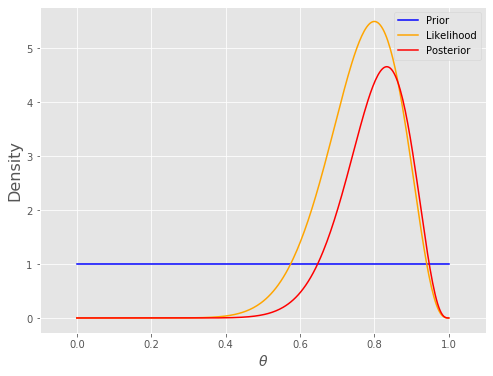

In [5]:
plotPL(n=15, y=12,alpha=1,beta=1)

##### 2) Weak data & Weak Prior

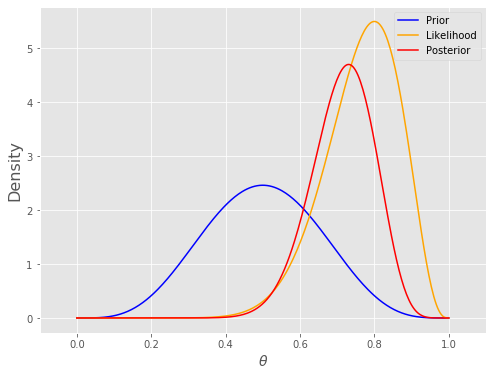

In [6]:
plotPL(n=15, y=12,alpha=5,beta=5)

##### 3) Weak data & Strong Prior

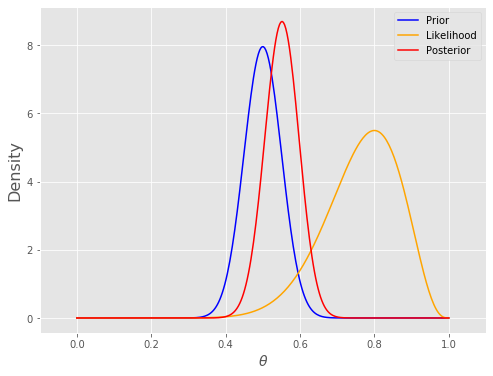

In [7]:
plotPL(n=15, y=12,alpha=50,beta=50)

##### 4) Strong data & Uninformative Prior

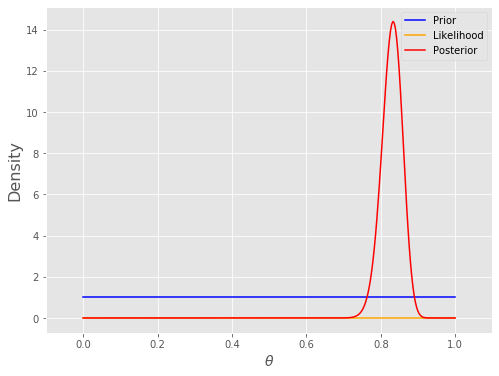

In [8]:
plotPL(n=150, y=120,alpha=1,beta=1)

##### 5) Strong data & Weak Prior

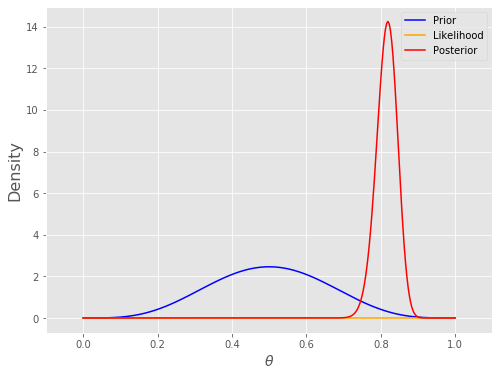

In [9]:
plotPL(n=150, y=120,alpha=5,beta=5)

##### 6) Strong data & Strong Prior

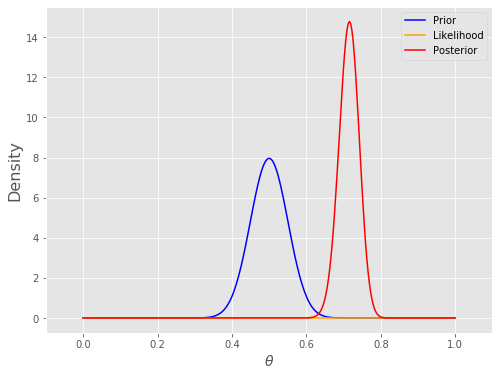

In [10]:
plotPL(n=150, y=120,alpha=50,beta=50)

### Q2. BDA 1.3 Exercise

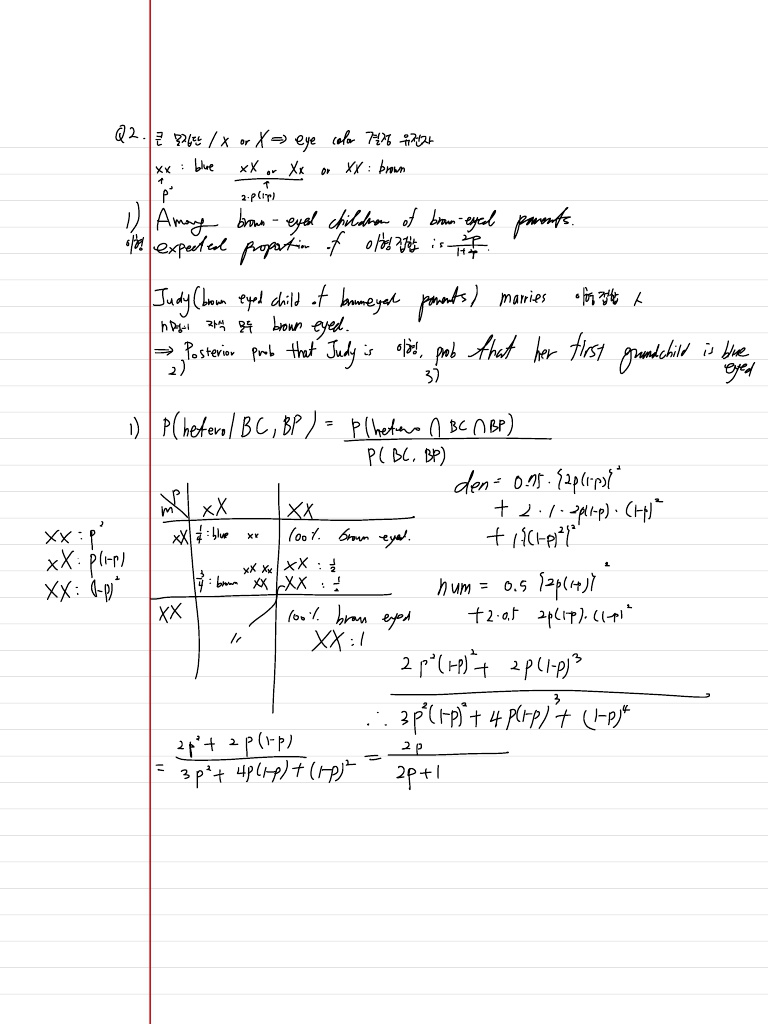

In [11]:
Image("/Users/Hyeondo/Pictures/image/week1/week1_1.jpg")

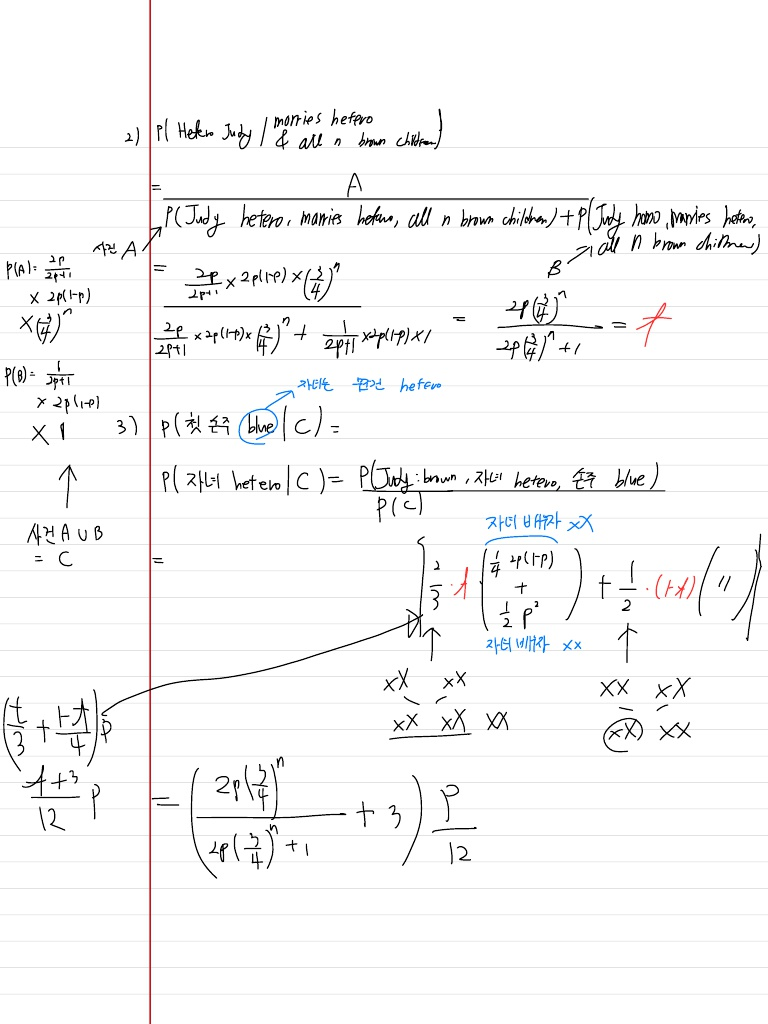

In [12]:
Image("/Users/Hyeondo/Pictures/image/week1/week1_2.jpg")

### Q3. 새로운 대학병원에서의 high risk 수술의 생존율에 관한 분석. 다른 병원에서의 경험을 통해 생존율은 $0.9$ 정도로 예상되며 $0.8$ 미만이거나 $0.97$ 초과일 것 같지는 않다고 생각한다.

1) $E(\theta) = 0.9 = \frac{\alpha}{\alpha + \beta} $ 이므로 $\alpha : \beta = 9:1$

In [13]:
k = 1

while (st.beta.cdf(0.97, 9*k, k) - st.beta.cdf(0.8, 9*k, k) < 0.95):
    
    k = k + 1

print(k)

5


#### Prior : $\theta \sim Beta(45,5)$

2) 10명 다 생존하므로 위의 1번을 응용하면 Posterior : $Beta(45+10, 5+10-10) = Beta(55,5)$

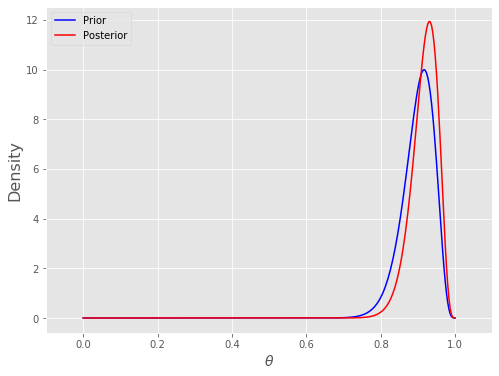

In [14]:
prior = st.beta(45,5) ; post = st.beta(55,5)
thetas = np.linspace(0, 1, 300)
plt.figure(figsize=(8, 6))
plt.style.use('ggplot')
plt.plot(thetas, prior.pdf(thetas), label='Prior', c='blue')
plt.plot(thetas, post.pdf(thetas), label='Posterior', c='red')
plt.xlim([-0.10, 1.10])
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel('Density', fontsize=16)
plt.legend();

3) 생존확률

In [15]:
import scipy.special as sc

In [16]:
print(1- (20 * sc.beta(74,6) / sc.beta(55,5) + sc.beta(75,5)/ sc.beta(55,5)))

0.4776809916050423


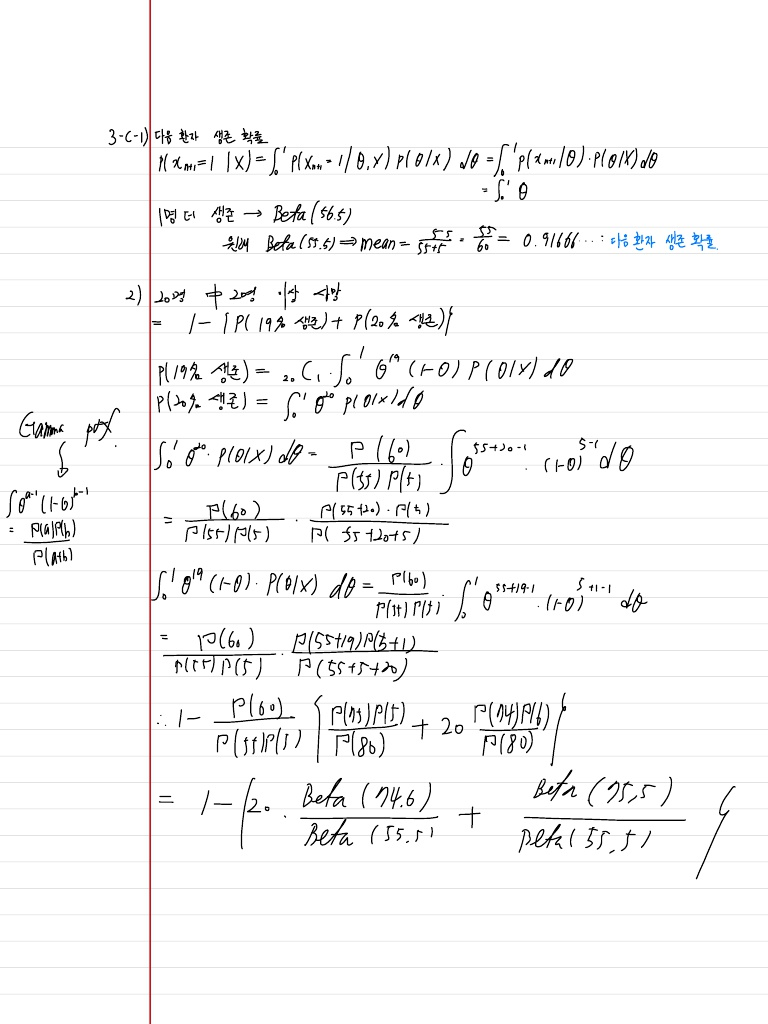

In [17]:
Image("/Users/Hyeondo/Pictures/image/week1/week1_3.jpg")